<a href="https://colab.research.google.com/github/VinothiniRamsingh/openmp1/blob/main/dbscan_titanicdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['encoded_sex'] = df['Sex'].astype('category').cat.codes
df['encoded_Embarked'] = df['Embarked'].astype('category').cat.codes

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoded_sex,encoded_Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       183 non-null    int64  
 1   Survived          183 non-null    int64  
 2   Pclass            183 non-null    int64  
 3   Name              183 non-null    object 
 4   Sex               183 non-null    object 
 5   Age               183 non-null    float64
 6   SibSp             183 non-null    int64  
 7   Parch             183 non-null    int64  
 8   Ticket            183 non-null    object 
 9   Fare              183 non-null    float64
 10  Cabin             183 non-null    object 
 11  Embarked          183 non-null    object 
 12  encoded_sex       183 non-null    int8   
 13  encoded_Embarked  183 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(5)
memory usage: 18.9+ KB


In [26]:
df = df[['Pclass','Age','SibSp','Parch','Fare','encoded_sex','encoded_Embarked']]

In [27]:
X=df.to_numpy()

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
model=DBSCAN()

In [30]:
dr = model.fit(X)

In [32]:
labels = dr.labels_

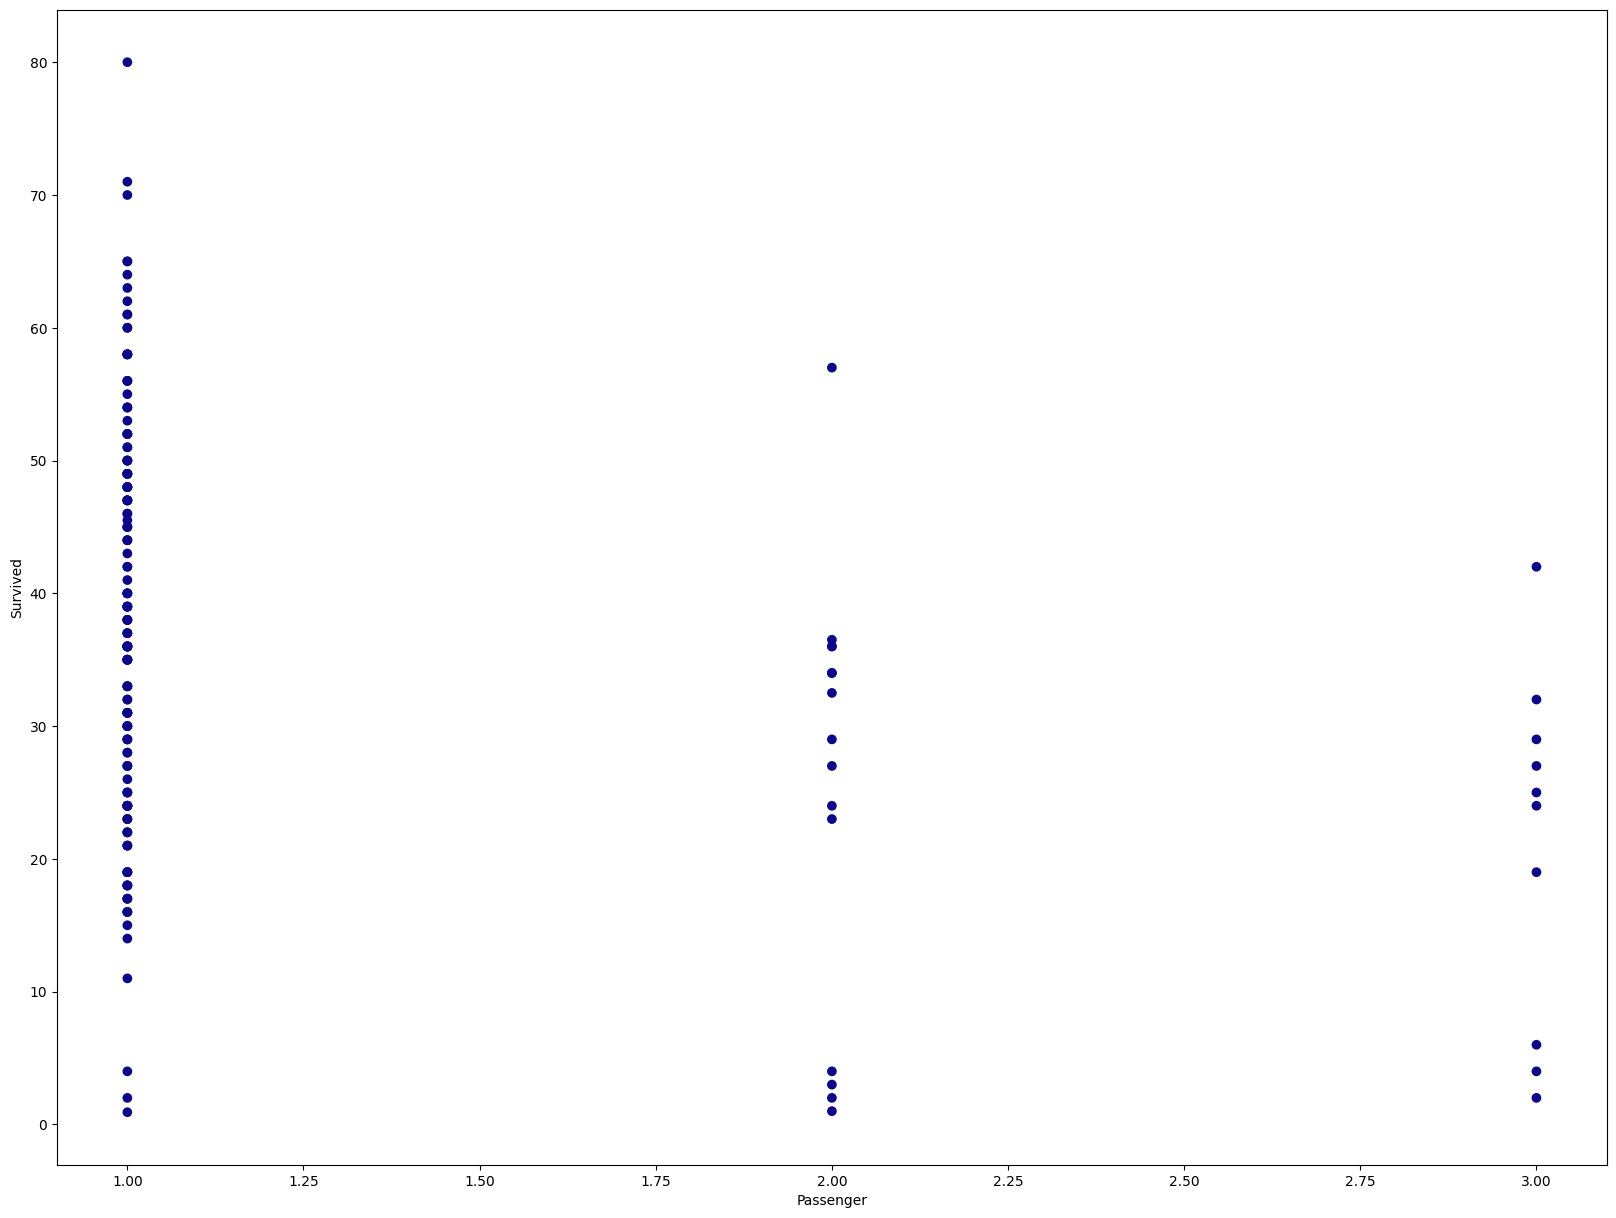

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Passenger") # X-axis label
plt.ylabel("Survived") # Y-axis label
plt.show()

Text(0, 0.5, 'Survived')

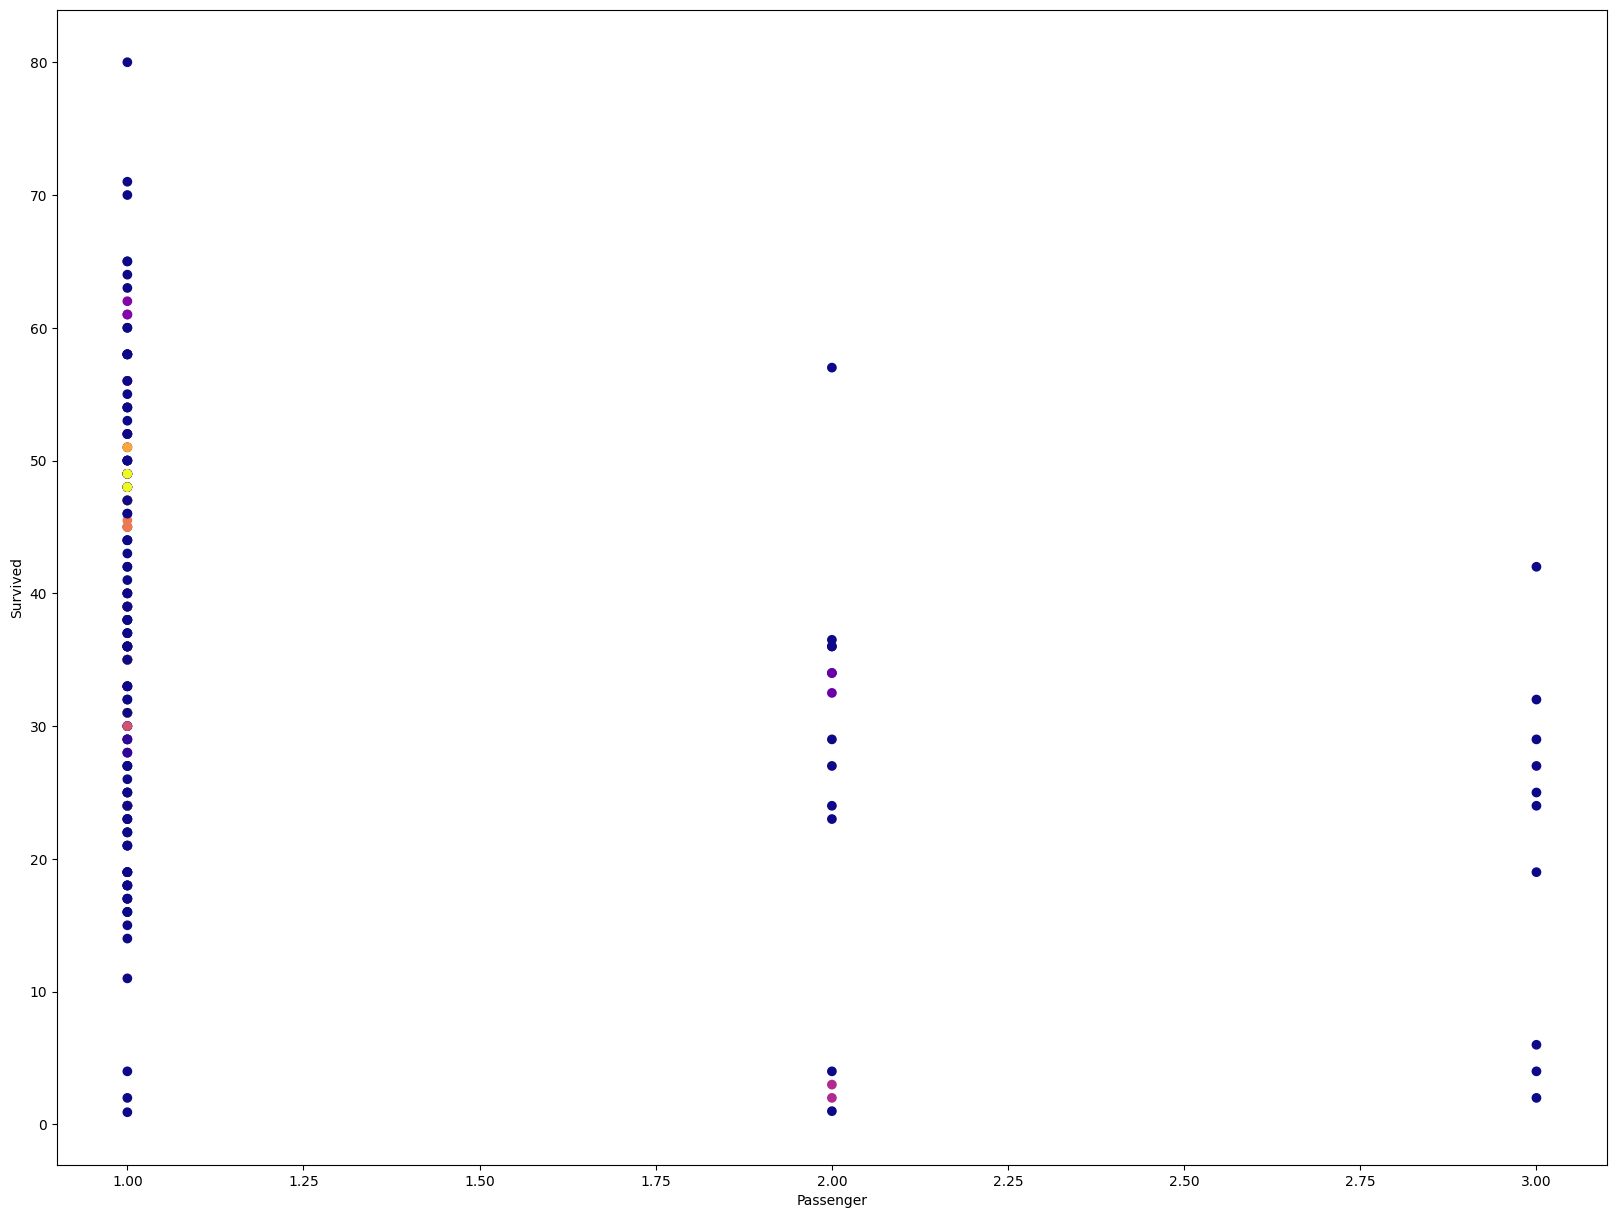

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Passenger")
plt.ylabel("Survived")